In [1]:
!pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"thefaithfulservantii","key":"f1da2d8ef67ba035599bc4c6602ad44d"}'}

In [3]:
! mkdir ~/.kaggle

In [4]:
! cp kaggle.json ~/.kaggle/

In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
! kaggle datasets list

ref                                                            title                                           size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------------  ---------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
rahulvyasm/netflix-movies-and-tv-shows                         Netflix Movies and TV Shows                      1MB  2024-04-10 09:48:38          22011        480  1.0              
jainaru/world-happiness-report-2024-yearly-updated             World Happiness Report- 2024                    62KB  2024-05-15 19:04:34           2003         39  1.0              
sahirmaharajj/school-student-daily-attendance                  School Student Daily Attendance                  2MB  2024-04-29 19:29:56           5877        123  1.0              
jainaru/thyroid-disease-data                                   Thyroid Disease Data       

In [7]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

Dataset URL: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia
License(s): other
 99% 2.27G/2.29G [00:25<00:00, 224MB/s]
100% 2.29G/2.29G [00:25<00:00, 96.3MB/s]


In [8]:
import torch
from torch import nn

import requests
import zipfile
from pathlib import Path
data_path=Path('data/')
image_path=data_path / 'chest-xray-pneumonia'

if image_path.is_dir():
  print(f'{image_path} directory already exists...skipping download')
else:
  print(f'{image_path} does not exist, creating one...')
  image_path.mkdir(parents=True, exist_ok=True)


data/chest-xray-pneumonia does not exist, creating one...


In [10]:

with zipfile.ZipFile(data_path / 'chest-xray-pneumonia.zip', 'r') as zip_ref:
  print('fracture-multi-region-x-ray-data')
  zip_ref.extractall(image_path)

fracture-multi-region-x-ray-data


In [9]:
data_path / 'chest-xray-pneumonia.zip'


PosixPath('data/chest-xray-pneumonia.zip')

In [ ]:
image_path

PosixPath('data/chest-xray-pneumonia')

In [12]:
import os
def walk_through_dir(dir_path):

  for dirpath,dirnames, filenames in os.walk(dir_path):
    print(f'There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}')

In [11]:
train_dir=image_path / 'train'
test_dir= image_path / 'test'
val_dir=image_path/'val'
train_dir,test_dir,val_dir

(PosixPath('data/chest-xray-pneumonia/train'),
 PosixPath('data/chest-xray-pneumonia/test'),
 PosixPath('data/chest-xray-pneumonia/val'))

In [13]:
import random
from PIL import Image

random.seed(42)
image_path_list=list(image_path.glob('*/*/*.jpeg'))


In [14]:
random_image_path=random.choice(image_path_list)
print(random_image_path)

data/chest-xray-pneumonia/test/PNEUMONIA/person141_bacteria_678.jpeg


In [15]:
image_class=random_image_path.parent.stem
print(image_class)

PNEUMONIA


Random image path: data/chest-xray-pneumonia/test/PNEUMONIA/person141_bacteria_678.jpeg
image class: PNEUMONIA
image height:536
image width: 856


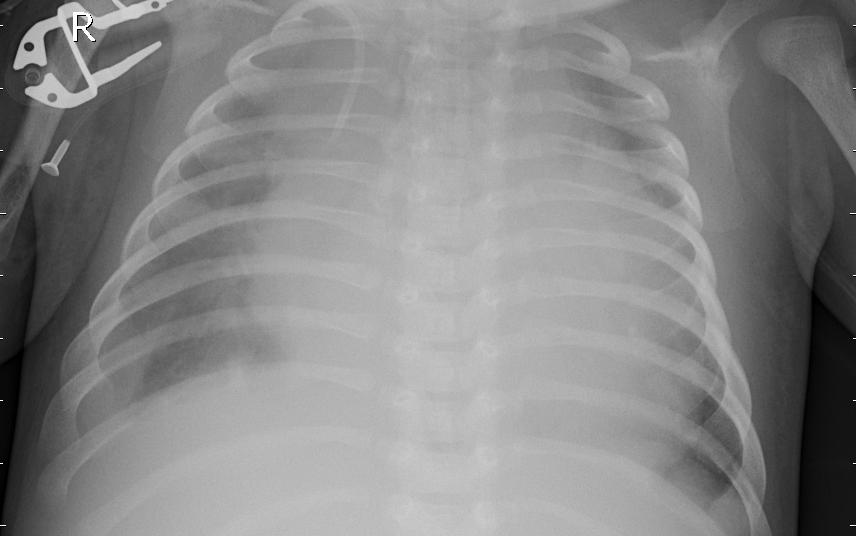

In [16]:
img=Image.open(random_image_path)
print(f'Random image path: {random_image_path}')
print(f'image class: {image_class}')
print(f'image height:{img.height}')
print(f'image width: {img.width}')
img

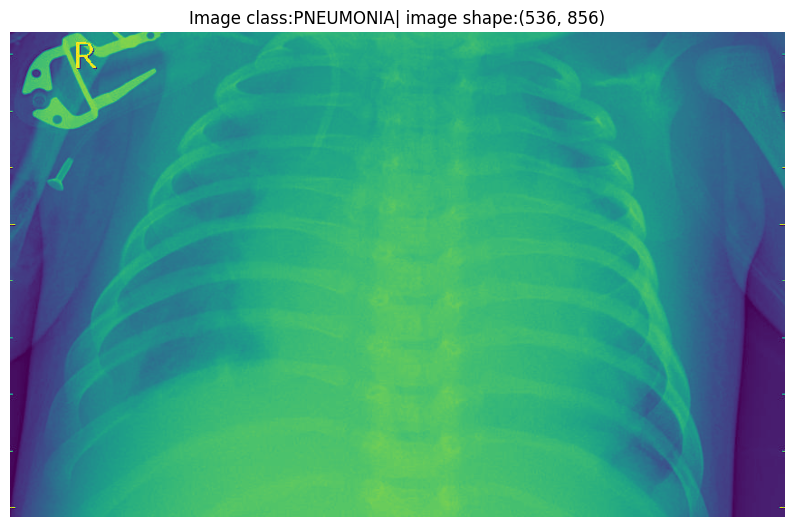

In [17]:
import numpy as np
import matplotlib.pyplot as plt

#turn image into array
img_as_array=np.asarray(img)
plt.figure(figsize=(10,7))
plt.imshow(img_as_array)
plt.title(f'Image class:{image_class}| image shape:{img_as_array.shape}')
plt.axis(False);

array([[15, 13, 10, ..., 70, 79, 90],
       [10, 10, 12, ..., 70, 77, 87],
       [12, 15, 20, ..., 71, 75, 83],
       ...,
       [11, 20, 26, ..., 22, 22, 22],
       [11, 20, 27, ..., 22, 22, 22],
       [12, 20, 27, ..., 22, 22, 22]], dtype=uint8)
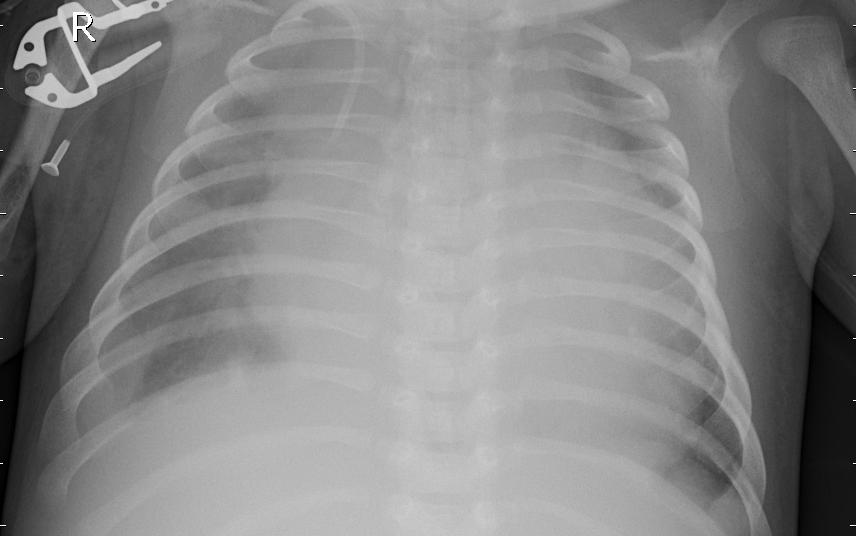

In [18]:
img_as_array

In [21]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets,transforms

data_transform=transforms.Compose([
    #Resize images
    transforms.Resize(size=(64,64)),
    #Flip the images randomly on the horizonatal
     transforms.RandomHorizontalFlip(p=0.5),
    #Turn the image into a torch.Tensor
    transforms.ToTensor()
])

In [22]:
torch.Size([3, 64, 64])

torch.Size([3, 64, 64])

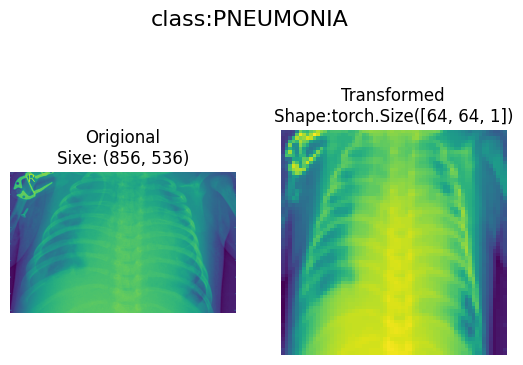

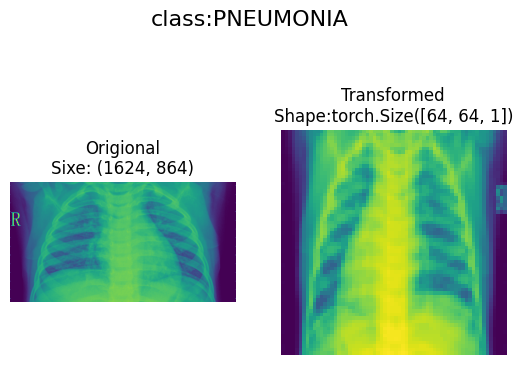

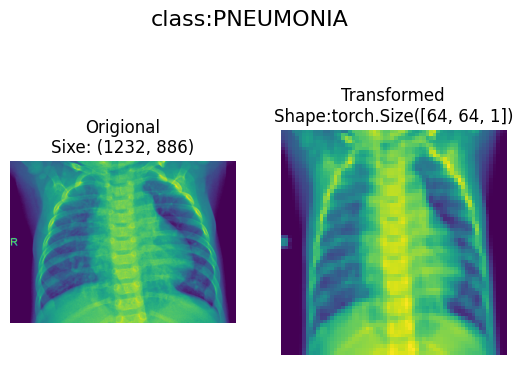

In [23]:
def plot_transformed_images(image_paths:list, transform, n=3, seed=None):
  #select random images from a path of images and loads then transforms them
  #Then plots the origional vs the transformed version
  if seed:
    random.seed(seed)
  random_image_paths=random.sample(image_paths, k=n)
  for image_path in random_image_paths:
    with Image.open(image_path) as f:
       fig,ax=plt.subplots(nrows=1,ncols=2)
       ax[0].imshow(f)
       ax[0].set_title(f'Origional\nSixe: {f.size}')
       ax[0].axis(False)

       transformed_image=transform(f).permute(1,2,0) #(c,H,W)-> (H,W,C)
       ax[1].imshow(transformed_image)
       ax[1].set_title(f'Transformed\nShape:{transformed_image.shape}')
       ax[1].axis('off')

       fig.suptitle(f'class:{image_path.parent.stem}',fontsize=16)
plot_transformed_images(image_paths=image_path_list,
    transform=data_transform,
    n=3,
    seed=42
)

In [24]:
from torchvision import datasets
train_data=datasets.ImageFolder(
    root=train_dir,
    transform=data_transform, #transform data
    target_transform=None
)
test_data=datasets.ImageFolder(
    root=test_dir,
    transform=data_transform,
    target_transform=None
)
val_data=datasets.ImageFolder(
    root=val_dir,
    transform=data_transform,
    target_transform=None
)

In [25]:
test_data,train_data,val_data

(Dataset ImageFolder
     Number of datapoints: 624
     Root location: data/chest-xray-pneumonia/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 5216
     Root location: data/chest-xray-pneumonia/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 16
     Root location: data/chest-xray-pneumonia/val
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [27]:
class_names=train_data.classes
class_names

['NORMAL', 'PNEUMONIA']

In [28]:
class_dict=train_data.class_to_idx
class_dict

{'NORMAL': 0, 'PNEUMONIA': 1}

In [29]:
len(train_data),len(test_data),len(val_data)

(5216, 624, 16)

In [30]:
train_data.samples[0]

('data/chest-xray-pneumonia/train/NORMAL/IM-0115-0001.jpeg', 0)

In [31]:
train_data[0]

(tensor([[[0.0784, 0.1098, 0.2392,  ..., 0.5412, 0.3843, 0.3686],
          [0.0784, 0.0863, 0.2118,  ..., 0.4706, 0.3686, 0.3569],
          [0.0824, 0.0745, 0.1804,  ..., 0.4078, 0.3608, 0.3412],
          ...,
          [0.1098, 0.1098, 0.1020,  ..., 0.0824, 0.0863, 0.0902],
          [0.1098, 0.1059, 0.1020,  ..., 0.1059, 0.1098, 0.1137],
          [0.1333, 0.1294, 0.1255,  ..., 0.2667, 0.2745, 0.2824]],
 
         [[0.0784, 0.1098, 0.2392,  ..., 0.5412, 0.3843, 0.3686],
          [0.0784, 0.0863, 0.2118,  ..., 0.4706, 0.3686, 0.3569],
          [0.0824, 0.0745, 0.1804,  ..., 0.4078, 0.3608, 0.3412],
          ...,
          [0.1098, 0.1098, 0.1020,  ..., 0.0824, 0.0863, 0.0902],
          [0.1098, 0.1059, 0.1020,  ..., 0.1059, 0.1098, 0.1137],
          [0.1333, 0.1294, 0.1255,  ..., 0.2667, 0.2745, 0.2824]],
 
         [[0.0784, 0.1098, 0.2392,  ..., 0.5412, 0.3843, 0.3686],
          [0.0784, 0.0863, 0.2118,  ..., 0.4706, 0.3686, 0.3569],
          [0.0824, 0.0745, 0.1804,  ...,

In [32]:
img,label=train_data[0][0],train_data[0][1]
img

tensor([[[0.0784, 0.1098, 0.2392,  ..., 0.5412, 0.3843, 0.3686],
         [0.0784, 0.0863, 0.2118,  ..., 0.4706, 0.3686, 0.3569],
         [0.0824, 0.0745, 0.1804,  ..., 0.4078, 0.3608, 0.3412],
         ...,
         [0.1098, 0.1098, 0.1020,  ..., 0.0824, 0.0863, 0.0902],
         [0.1098, 0.1059, 0.1020,  ..., 0.1059, 0.1098, 0.1137],
         [0.1333, 0.1294, 0.1255,  ..., 0.2667, 0.2745, 0.2824]],

        [[0.0784, 0.1098, 0.2392,  ..., 0.5412, 0.3843, 0.3686],
         [0.0784, 0.0863, 0.2118,  ..., 0.4706, 0.3686, 0.3569],
         [0.0824, 0.0745, 0.1804,  ..., 0.4078, 0.3608, 0.3412],
         ...,
         [0.1098, 0.1098, 0.1020,  ..., 0.0824, 0.0863, 0.0902],
         [0.1098, 0.1059, 0.1020,  ..., 0.1059, 0.1098, 0.1137],
         [0.1333, 0.1294, 0.1255,  ..., 0.2667, 0.2745, 0.2824]],

        [[0.0784, 0.1098, 0.2392,  ..., 0.5412, 0.3843, 0.3686],
         [0.0784, 0.0863, 0.2118,  ..., 0.4706, 0.3686, 0.3569],
         [0.0824, 0.0745, 0.1804,  ..., 0.4078, 0.3608, 0.

In [33]:
class_names[label]

'NORMAL'

In [34]:
print(f'Image Tensor: \n {img}')
print(f'Image shape: {img.shape}')
print(f'Image datatype : {img.dtype}')
print(f'image label:{label}')
print(f'Label datatype: {type(label)}')

Image Tensor: 
 tensor([[[0.0784, 0.1098, 0.2392,  ..., 0.5412, 0.3843, 0.3686],
         [0.0784, 0.0863, 0.2118,  ..., 0.4706, 0.3686, 0.3569],
         [0.0824, 0.0745, 0.1804,  ..., 0.4078, 0.3608, 0.3412],
         ...,
         [0.1098, 0.1098, 0.1020,  ..., 0.0824, 0.0863, 0.0902],
         [0.1098, 0.1059, 0.1020,  ..., 0.1059, 0.1098, 0.1137],
         [0.1333, 0.1294, 0.1255,  ..., 0.2667, 0.2745, 0.2824]],

        [[0.0784, 0.1098, 0.2392,  ..., 0.5412, 0.3843, 0.3686],
         [0.0784, 0.0863, 0.2118,  ..., 0.4706, 0.3686, 0.3569],
         [0.0824, 0.0745, 0.1804,  ..., 0.4078, 0.3608, 0.3412],
         ...,
         [0.1098, 0.1098, 0.1020,  ..., 0.0824, 0.0863, 0.0902],
         [0.1098, 0.1059, 0.1020,  ..., 0.1059, 0.1098, 0.1137],
         [0.1333, 0.1294, 0.1255,  ..., 0.2667, 0.2745, 0.2824]],

        [[0.0784, 0.1098, 0.2392,  ..., 0.5412, 0.3843, 0.3686],
         [0.0784, 0.0863, 0.2118,  ..., 0.4706, 0.3686, 0.3569],
         [0.0824, 0.0745, 0.1804,  ..., 0.

Origional shape: torch.Size([3, 64, 64])
image permute: torch.Size([64, 64, 3])


Text(0.5, 1.0, 'NORMAL')

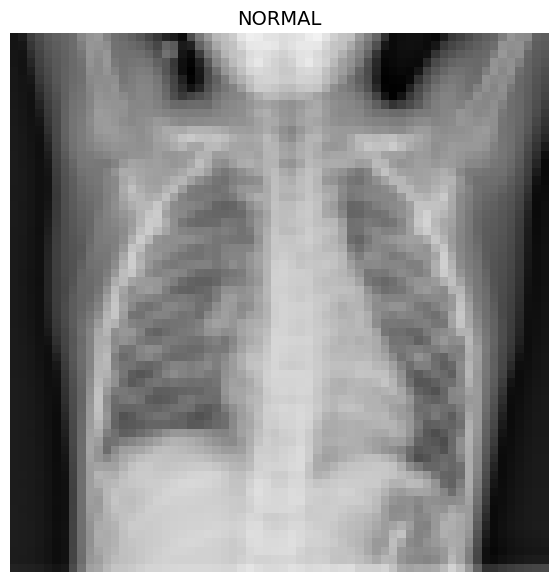

In [35]:
img_permute=img.permute(1,2,0)
print(f'Origional shape: {img.shape}')
print(f'image permute: {img_permute.shape}')
plt.figure(figsize=(10,7))
plt.imshow(img_permute)
plt.axis('off')
plt.title(class_names[label],fontsize=14)

In [36]:
from torch.utils.data import DataLoader
BATCH_SIZE=16
train_dataloader=DataLoader(
    dataset=train_data,
    batch_size=BATCH_SIZE,
    num_workers=os.cpu_count(),
    shuffle=True
)
test_dataloader=DataLoader(
    dataset=test_data,
    batch_size=BATCH_SIZE,
    num_workers=os.cpu_count(),
    shuffle=False
)
val_dataloader=DataLoader(
    dataset=val_data,
    batch_size=BATCH_SIZE,
    num_workers=os.cpu_count(),
    shuffle=False
)

In [37]:
len(test_dataloader), len(train_dataloader),len(val_dataloader)

(39, 326, 1)

In [38]:
img,label=next(iter(train_dataloader))
#Batch_size=1

print(f'image shape:{img.shape}')
print(f'label shape:{label.shape}')

image shape:torch.Size([16, 3, 64, 64])
label shape:torch.Size([16])


In [39]:
import torch
from torch import nn
import torch.nn as nn
import torchvision
from torchvision import datasets
import torchvision as transforms
from torchvision.transforms import ToTensor

In [ ]:
class TinyVGG(nn.Module):
    def __init__(self, input_channels: int, num_classes: int):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_channels, out_channels=10, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=10, out_channels=10, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=10, out_channels=20, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=20, out_channels=20, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=20 * 16 * 16, out_features=num_classes),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.conv_block_1(x)
        x = self.conv_block_2(x)
        x = self.classifier(x)
        return x

model_1 = TinyVGG(
    input_channels=3,  # Number of channels in the input image (RGB)
    num_classes=1      # Binary classification
).to('cpu')


In [40]:
import mlxtend
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [ ]:
mlxtend.__version__

'0.22.0'

In [ ]:
#Start real stuff

In [41]:
class Chest_xray_1(nn.Module):
    def __init__(self, input_channels: int, num_classes: int):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_channels, out_channels=20, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=20, out_channels=20, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=20 * 32 * 32, out_features=num_classes),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.conv_block_1(x)
        x = self.classifier(x)
        return x


In [42]:
class Chest_xray_2(nn.Module):
    def __init__(self, input_channels: int, num_classes: int):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_channels, out_channels=20, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=20, out_channels=20, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=20, out_channels=20, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=20, out_channels=20, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )

        # Add dropout layer with a probability of 0.5
        self.dropout = nn.Dropout(0.5)

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=20 * 16 * 16, out_features=num_classes),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.conv_block_1(x)
        x = self.conv_block_2(x)

        # Apply dropout after the convolutional layers
        x = self.dropout(x)

        x = self.classifier(x)
        return x


In [43]:
class Chest_xray_3(nn.Module):
    def __init__(self, input_channels: int, num_classes: int):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_channels, out_channels=20, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=20, out_channels=20, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=20, out_channels=20, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=20, out_channels=20, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv_block_3 = nn.Sequential(
            nn.Conv2d(in_channels=20, out_channels=20, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=20, out_channels=20, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=20 * 8 * 8, out_features=num_classes),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.conv_block_1(x)
        x = self.conv_block_2(x)
        x = self.conv_block_3(x)
        x = self.classifier(x)
        return x

In [44]:
class Chest_xray_4(nn.Module):
    def __init__(self, input_channels: int, num_classes: int):
        super().__init__()
        self.conv_block = nn.Sequential(
            nn.Conv2d(in_channels=input_channels, out_channels=32, kernel_size=5, stride=1, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.fc_block = nn.Sequential(
            nn.Linear(64 * 16 * 16, 256),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(256, num_classes),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.conv_block(x)
        x = x.view(x.size(0), -1)
        x = self.fc_block(x)
        return x

In [45]:
import torch
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm
from sklearn.metrics import accuracy_score  # Ensure this import is present
import matplotlib.pyplot as plt


In [46]:
def calculate_loss_and_accuracy(model, dataloader, loss_fn):
    model.eval()
    total_loss = 0.0
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for X, y in dataloader:
            # Move data to GPU
            X, y = X.to('cuda'), y.to('cuda')

            y_pred = model(X)
            loss = loss_fn(y_pred, y.float().unsqueeze(1))
            total_loss += loss.item()

            preds = y_pred.round()  # Convert predictions to binary
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(y.cpu().numpy())

    avg_loss = total_loss / len(dataloader)
    accuracy = accuracy_score(all_labels, all_preds)

    return avg_loss, accuracy


In [47]:
model_1 = Chest_xray_1(input_channels=3, num_classes=1).to('cuda')
model_2 = Chest_xray_2(input_channels=3, num_classes=1).to('cuda')
model_3 = Chest_xray_3(input_channels=3, num_classes=1).to('cuda')
model_4 = Chest_xray_4(input_channels=3, num_classes=1).to('cuda')

#One model
models_list = [model_1]
model_names = ["Model_1"]

# List of models to train
#models_list = [model_1, model_2, model_3, model_4]
#model_names = ["Model_1", "Model_2", "Model_3", "Model_4"]

In [48]:
# Initialize lists to store losses and accuracies for all models
train_losses = [[] for _ in range(len(models_list))]
val_losses = [[] for _ in range(len(models_list))]
test_losses = [[] for _ in range(len(models_list))]

train_accuracies = [[] for _ in range(len(models_list))]
val_accuracies = [[] for _ in range(len(models_list))]
test_accuracies = [[] for _ in range(len(models_list))]

In [49]:
loss_fn = nn.BCELoss(reduction='mean')

# Number of epochs
epochs = 5

# Loop over models
for model, name, train_losses_model, val_losses_model, test_losses_model, train_accuracies_model, val_accuracies_model, test_accuracies_model in zip(models_list, model_names, train_losses, val_losses, test_losses, train_accuracies, val_accuracies, test_accuracies):
    print(f"\nTraining {name}...\n")

    # Move model to GPU
    model = model.to('cuda')

    # Define the optimizer
    optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

    for epoch in tqdm(range(1, epochs + 1)):
        print(f'Epoch: {epoch}\n-----')

        # Training
        model.train()
        total_loss = 0.0
        all_preds = []
        all_labels = []

        for X, y in train_dataloader:
            # Move data to GPU
            X, y = X.to('cuda'), y.to('cuda')

            optimizer.zero_grad()
            y_pred = model(X)
            loss = loss_fn(y_pred, y.float().unsqueeze(1))
            loss.backward()
            optimizer.step()

            total_loss += loss.item()

            preds = y_pred.round()  # Convert predictions to binary
            all_preds.extend(preds.detach().cpu().numpy())
            all_labels.extend(y.detach().cpu().numpy())

        train_loss = total_loss / len(train_dataloader)
        train_losses_model.append(train_loss)

        train_accuracy = accuracy_score(all_labels, all_preds)
        train_accuracies_model.append(train_accuracy)

        # Validation
        val_loss, val_accuracy = calculate_loss_and_accuracy(model, val_dataloader, loss_fn)
        val_losses_model.append(val_loss)
        val_accuracies_model.append(val_accuracy)

        print(f'Train loss: {train_loss:.4f}, Train accuracy: {train_accuracy:.4f}')
        print(f'Validation loss: {val_loss:.4f}, Validation accuracy: {val_accuracy:.4f}')

        # Test
        test_loss, test_accuracy = calculate_loss_and_accuracy(model, test_dataloader, loss_fn)
        test_losses_model.append(test_loss)
        test_accuracies_model.append(test_accuracy)

        print(f'Test loss: {test_loss:.4f}, Test accuracy: {test_accuracy:.4f}')

def calculate_loss_and_accuracy(model, dataloader, loss_fn):
    model.eval()
    total_loss = 0.0
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for X, y in dataloader:
            # Move data to GPU
            X, y = X.to('cuda'), y.to('cuda')

            y_pred = model(X)
            loss = loss_fn(y_pred, y.float().unsqueeze(1))
            total_loss += loss.item()

            preds = y_pred.round()  # Convert predictions to binary
            all_preds.extend(preds.detach().cpu().numpy())
            all_labels.extend(y.detach().cpu().numpy())

    avg_loss = total_loss / len(dataloader)
    accuracy = accuracy_score(all_labels, all_preds)
    return avg_loss, accuracy


Training Model_1...



  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1
-----
Train loss: 8.3419, Train accuracy: 0.7479
Validation loss: 0.5490, Validation accuracy: 0.7500


 20%|██        | 1/5 [01:23<05:34, 83.52s/it]

Test loss: 0.5388, Test accuracy: 0.7596
Epoch: 2
-----
Train loss: 0.3495, Train accuracy: 0.8524
Validation loss: 1.3766, Validation accuracy: 0.5000


 40%|████      | 2/5 [02:46<04:09, 83.20s/it]

Test loss: 1.0833, Test accuracy: 0.6715
Epoch: 3
-----
Train loss: 0.2111, Train accuracy: 0.9160
Validation loss: 0.5343, Validation accuracy: 0.6875


 60%|██████    | 3/5 [04:10<02:47, 83.59s/it]

Test loss: 0.4419, Test accuracy: 0.8077
Epoch: 4
-----
Train loss: 0.1765, Train accuracy: 0.9293
Validation loss: 0.7294, Validation accuracy: 0.6250


 80%|████████  | 4/5 [05:32<01:22, 82.81s/it]

Test loss: 0.5849, Test accuracy: 0.7676
Epoch: 5
-----
Train loss: 0.1597, Train accuracy: 0.9369
Validation loss: 0.6385, Validation accuracy: 0.6875


100%|██████████| 5/5 [06:55<00:00, 83.05s/it]

Test loss: 0.8060, Test accuracy: 0.7548



Model_1 - Length of train losses: 5, val losses: 5, test losses: 5
Model_1 - Length of train accuracies: 5, val accuracies: 5, test accuracies: 5
Model_1 - Using minimum length: 5


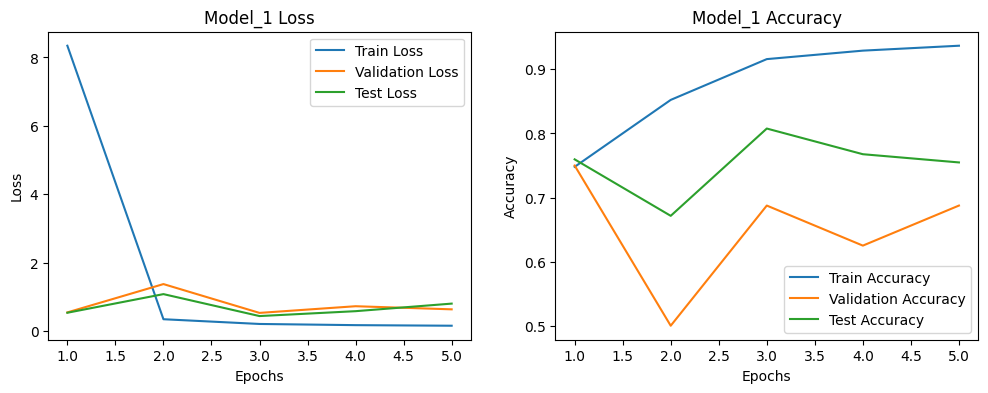

In [50]:
import matplotlib.pyplot as plt

# Ensure lists have correct lengths
for name, train_losses_model, val_losses_model, test_losses_model, train_accuracies_model, val_accuracies_model, test_accuracies_model in zip(model_names, train_losses, val_losses, test_losses, train_accuracies, val_accuracies, test_accuracies):
    print(f"\n{name} - Length of train losses: {len(train_losses_model)}, val losses: {len(val_losses_model)}, test losses: {len(test_losses_model)}")
    print(f"{name} - Length of train accuracies: {len(train_accuracies_model)}, val accuracies: {len(val_accuracies_model)}, test accuracies: {len(test_accuracies_model)}")

    # Ensure the lengths are consistent
    min_length = min(len(train_losses_model), len(val_losses_model), len(test_losses_model), len(train_accuracies_model), len(val_accuracies_model), len(test_accuracies_model))
    print(f"{name} - Using minimum length: {min_length}")

    epochs_range = range(1, min_length + 1)

    # Plot losses
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, train_losses_model[:min_length], label='Train Loss')
    plt.plot(epochs_range, val_losses_model[:min_length], label='Validation Loss')
    plt.plot(epochs_range, test_losses_model[:min_length], label='Test Loss')
    plt.title(f'{name} Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plot accuracies
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, train_accuracies_model[:min_length], label='Train Accuracy')
    plt.plot(epochs_range, val_accuracies_model[:min_length], label='Validation Accuracy')
    plt.plot(epochs_range, test_accuracies_model[:min_length], label='Test Accuracy')
    plt.title(f'{name} Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()


In [52]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

# Define function to plot confusion matrix
def plot_cm(model, dataloader):
    model.eval()
    y_true = []
    y_pred = []

    with torch.no_grad():
        for X, y in dataloader:
            outputs = model(X).to('cuda')
            predicted = (outputs > 0.5).int()
            y_true.extend(y.numpy())
            y_pred.extend(predicted.numpy())

    cm = confusion_matrix(y_true, y_pred)
    plot_confusion_matrix(conf_mat=cm, show_normed=True, figsize=(8, 8))
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

# Plot confusion matrix for each model
for model, name in zip(models_list, model_names):
    print(f"Confusion matrix for {name}:")
    plot_cm(model, test_dataloader)


Confusion matrix for Model_1:


RuntimeError: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor